In [304]:
from IPython.display import display, Math, Latex

# Libraries you might need
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns

# Homework 5

## Exercise 1: Correlations
Let's recreate the plot from the lecture. Assume two neurons that are tuned to a directed stimulus $s\in[-\pi, \pi]$. The neurons are Poisson neurons with rates (in Hz)
\begin{align}
r_1(s) &= \exp\left(\cos(s)\right) \\
r_2(s) &= \exp\left(\cos\left(s - \frac{\pi}{4}\right)\right)
\end{align}

a) Draw 10,000 stimuli uniformly. Draw spike counts for a measurement duration of 10 seconds and save the firing rates. Discretize the range for the stimuli into 20 bins and compute the tuning curves (average firing rate). Plot the tuning curve. Additionally, pick one bin and plot all firing rates for that bin as a scatter plot. (3 points)

*Hint: If you have trouble properly binning, this is exactly one of the tasks were LLMs are useful. However, remember that you are responsible for whatever you submit.*

b) For this one bin, scatter plot the firing rates. Compute and plot the noise correlation. (1 point)

c) Scatter plot the simulated tuning curves. Compute and plot the signal correlation. (1 point)

d) Confirm law of total covariance by computing all of its components. (1 point)

e) Now we conduct a different experiment with only 2 stimuli: $s_1 = 0$ and $s_2=\frac{\pi}{4}$. Draw 1000 stimuli each and create a scatter plot of the firing rate responses. In the same plot, illustrate the covariance and the decision boundary. (2 points)

*Hint: If necessary use libraries and LLMs to plot the elements. Please submit clean code. Especially LLMs tend to generate nasty and unnecessarily long code. You are responsible for what you submit.*

f) Brainstorm at least three biologically plausible ways how noise covariances could appear in our measurements. Discuss whether they can be positive or negative. (1,5 points)

*Hint: You are allowed and encouraged to use the forum for an open exchange among students for this.*

g) Choose one model that allows for positive and negative noise correlations and implement it. Repeat the plot from e) and discuss whether the noise correlations support or obstruct decoding. (2 points)

h) Repeat g) for a different set of stimuli that have a different signal correlation. (1 bonus point)

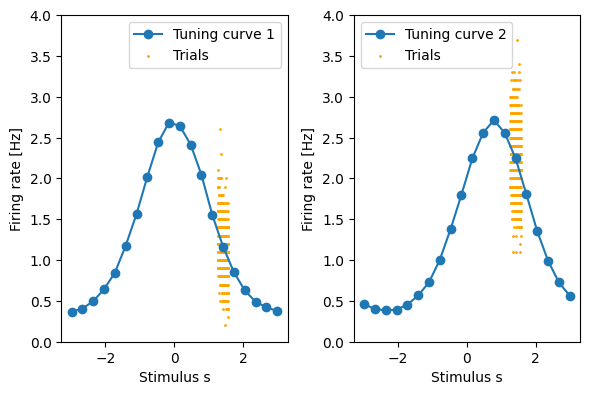

In [305]:
# parameters
n_trials = 10_000
n_samples= 10000
t_max = 10
n_bins = 20
bins = np.linspace(-np.pi, np.pi, n_bins+1, endpoint=True)
bins_middle = (bins[1:] + bins[:-1]) / 2
dt=bins[1]-bins[0]
# Seed the random number generator
np.random.seed(0)
def rate1(s):
    return np.exp(np.cos(s))
def rate2(s):
    return np.exp(np.cos(s-np.pi/4))


s=np.random.uniform(-np.pi, np.pi, n_trials)

rate1_data=rate1(s)
rate2_data=rate2(s)

firing_rate1= np.random.poisson(rate1_data*t_max, size=n_samples)
firing_rate2= np.random.poisson(rate2_data*t_max, size=n_samples)

 
mask=0
tuning_curve1= np.zeros(n_bins)
tuning_curve2= np.zeros(n_bins)

for i in range(n_bins):
    mask = (s >= bins[i]) & (s < bins[i+1])
    tuning_curve1[i] = np.mean(firing_rate1[mask])/t_max
    tuning_curve2[i] = np.mean(firing_rate2[mask])/t_max

# Plot the tuning curve. 
fig,ax = plt.subplots(1,2,figsize=(6,4))
ax[0].plot(bins_middle, tuning_curve1, 'o-',label='Tuning curve 1')
ax[1].plot(bins_middle, tuning_curve2, 'o-',label='Tuning curve 2')
ax[0].set_xlabel('Stimulus s')
ax[0].set_ylabel('Firing rate [Hz]')
ax[1].set_xlabel('Stimulus s')
ax[1].set_ylabel('Firing rate [Hz]')
fig.tight_layout()
# plot dot for each 20 bins
ax[0].set_ylim(0, 4)
ax[1].set_ylim(0, 4)


bin_idx= 14
indices=( (s>= bins[bin_idx]) & (s<bins[bin_idx+1]))
firing_bin1= firing_rate1[indices]/t_max
firing_bin2= firing_rate2[indices]/t_max
s_bin= s[ indices]
ax[0].scatter(s_bin, firing_bin1,color='orange', s=1, label='Trials')
ax[1].scatter(s_bin, firing_bin2,color='orange', s=1, label= 'Trials')
ax[0].legend()
ax[1].legend()

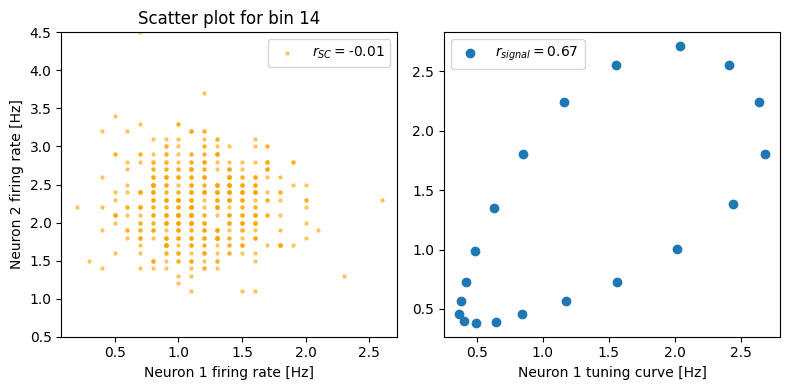

In [306]:
# Plot the scatter plot for a selected bin
fig, ax= plt.subplots(1,2, figsize=(8,4))
noise_corr=np.corrcoef(firing_bin1,firing_bin2)[0,1]
signal_corr=np.corrcoef(tuning_curve1,tuning_curve2)[0,1]
ax[0].scatter(firing_bin1, firing_bin2, s=5, alpha=0.5, color='orange',label=r'$r_{SC}=$' + f'{round(noise_corr,2)}')
ax[0].set_xlabel('Neuron 1 firing rate [Hz]')
ax[0].set_ylabel('Neuron 2 firing rate [Hz]')
ax[0].set_title(f'Scatter plot for bin {bin_idx}')
ax[0].set_ylim([0.5,4.5])
ax[0].legend()
ax[1].scatter(tuning_curve1,tuning_curve2,label=r'$r_{signal}=$' + f'{round(signal_corr,2)}')
ax[1].set_xlabel('Neuron 1 tuning curve [Hz]')
ax[1].legend()
plt.tight_layout()
plt.show()

In [307]:
# d) Law of total covariance
# Calculate the total covariance matrix 2x2
total_cov = np.cov(firing_rate1/t_max, firing_rate2/t_max)

print(f'Total covariance matrix: \n{total_cov}')
# Signal covariance matrix
signal_cov= np.cov(tuning_curve1, tuning_curve2)
print(f'Signal correlation: \n{signal_cov}')

# Average Noise covariance matrix
noise_cov = np.cov(firing_bin1, firing_bin2)
print(f'Average noise correlation: \n{noise_cov}')

sum_cov= signal_cov + noise_cov
error_cov=  sum_cov-total_cov 
print(f'Sum of signal and noise covariance: \n{sum_cov}')
print(f'Error covariance: \n{error_cov}')


Total covariance matrix: 
[[0.80655373 0.44718291]
 [0.44718291 0.78953503]]
Signal correlation: 
[[0.70292805 0.46718689]
 [0.46718689 0.69702071]]
Average noise correlation: 
[[ 0.12302206 -0.00143304]
 [-0.00143304  0.21070879]]
Sum of signal and noise covariance: 
[[0.82595011 0.46575384]
 [0.46575384 0.9077295 ]]
Error covariance: 
[[0.01939638 0.01857093]
 [0.01857093 0.11819447]]


In [356]:
# e)
n_trials = 1000
s_1 = 0
s_2 = 1
def do_magic(stimuli, rate1,rate2,responses, n_trials=1000, t_max=10):
    
    for i, s in enumerate(stimuli):
        rate1_data=rate1(s)
        rate2_data=rate2(s)
        firing_rate1= np.random.poisson(rate1_data*t_max, size=n_trials)/t_max
        firing_rate2= np.random.poisson(rate2_data*t_max, size=n_trials)/t_max
        responses[0, i, :] = firing_rate1
        responses[1, i, :] = firing_rate2
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    color=['red','blue']
    for i in range(2):
        ax.scatter(responses[0, i, :], responses[1, i, :], s=5, alpha=0.5,label=f'Trials  s_{i}',color=color[i])
        ax.set_xlabel('Response Neuron 1 [Hz]')
        ax.set_ylabel('Response Neuron 2 [Hz]')
        ax.set_title(f'Stimulus {i+1}')
    ax.set_ylim([0.5, 4.5])
    ax.set_xlim([0.5, 5])
    ax.legend()

    for i in range(2):
        noise_cov = np.cov(responses[0, i, :], responses[1, i, :])
        # calculate the eigenvalues and eigenvectors of the noise covariance matrix
        eigvals, eigvecs = np.linalg.eig(noise_cov)
        # calculate the angle of the eigenvector with the largest eigenvalue
        angle = np.arctan2(eigvecs[1, 0], eigvecs[0, 0])
        # calculate the width and height of the ellipse
        width = 4* np.sqrt(eigvals[0])
        height = 4 * np.sqrt(eigvals[1]) # scaled manually
        # plot the ellipse
        x_mean=np.mean(responses[0, i, :])
        y_mean=np.mean(responses[1, i, :])
        ellipse = mpl.patches.Ellipse(xy=(x_mean, y_mean), width=width, height=height, angle=np.degrees(angle), edgecolor=color[i], facecolor='none', linestyle='--')
        ax.add_patch(ellipse)
        # plot the x_mean and y_mean as crosses
        ax.plot(x_mean, y_mean, 'x', color='black', markersize=10)
        
    # plot the decision boundary between the two stimuli, using Linear Discriminant Analysis
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    X = np.concatenate([responses[0, 0, :], responses[0, 1, :]])
    Y = np.concatenate([responses[1, 0, :], responses[1, 1, :]])
    labels = np.concatenate([np.zeros(n_trials), np.ones(n_trials)])
    X = X[:, np.newaxis]
    Y = Y[:, np.newaxis]
    lda = LinearDiscriminantAnalysis()
    lda.fit(np.concatenate([X, Y], axis=1), labels)
    x = np.linspace(1.5, 3, 100)
    y = (-lda.intercept_[0] - lda.coef_[0, 0] * x) / lda.coef_[0, 1]
    ax.plot(x, y, label='Decision boundary', color='black')
    ax.legend()



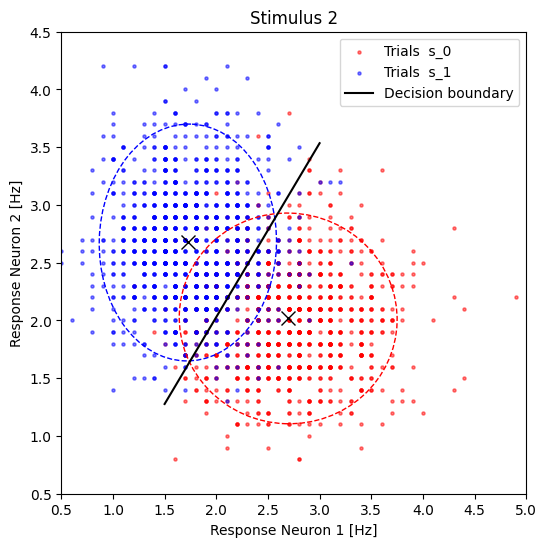

In [357]:
responses = np.zeros((2, 2, n_trials))
s0=0
s1=1
stimuli = [s0, s1]
do_magic(stimuli, rate1, rate2, responses, n_trials=n_trials, t_max=t_max)



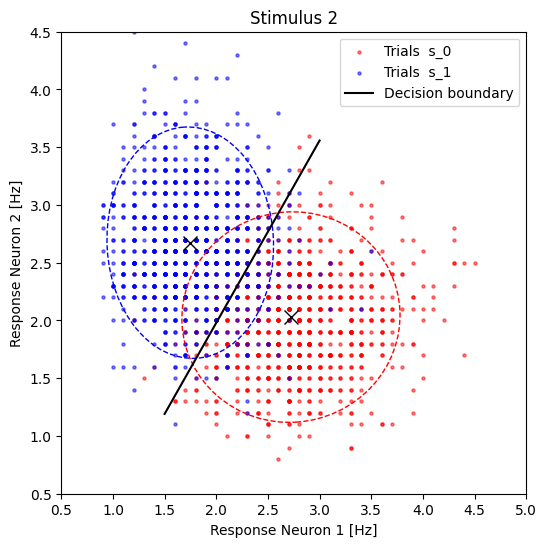

In [353]:
# e)
n_trials = 1000
s_1 = 0
s_2 = 1
responses = np.zeros((2, 2, n_trials))
for i, s in enumerate([s_1, s_2]):
    rate1_data=rate1(s)
    rate2_data=rate2(s)
    firing_rate1= np.random.poisson(rate1_data*t_max, size=n_trials)/10
    firing_rate2= np.random.poisson(rate2_data*t_max, size=n_trials)/10
    responses[0, i, :] = firing_rate1
    responses[1, i, :] = firing_rate2
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
color=['red','blue']
for i in range(2):
    ax.scatter(responses[0, i, :], responses[1, i, :], s=5, alpha=0.5,label=f'Trials  s_{i}',color=color[i])
    ax.set_xlabel('Response Neuron 1 [Hz]')
    ax.set_ylabel('Response Neuron 2 [Hz]')
    ax.set_title(f'Stimulus {i+1}')
ax.set_ylim([0.5, 4.5])
ax.set_xlim([0.5, 5])
ax.legend()

for i in range(2):
    noise_cov = np.cov(responses[0, i, :], responses[1, i, :])
    # calculate the eigenvalues and eigenvectors of the noise covariance matrix
    eigvals, eigvecs = np.linalg.eig(noise_cov)
    # calculate the angle of the eigenvector with the largest eigenvalue
    angle = np.arctan2(eigvecs[1, 0], eigvecs[0, 0])
    # calculate the width and height of the ellipse
    width = 4* np.sqrt(eigvals[0])
    height = 4 * np.sqrt(eigvals[1]) # scaled manually
    # plot the ellipse
    x_mean=np.mean(responses[0, i, :])
    y_mean=np.mean(responses[1, i, :])
    ellipse = mpl.patches.Ellipse(xy=(x_mean, y_mean), width=width, height=height, angle=np.degrees(angle), edgecolor=color[i], facecolor='none', linestyle='--')
    ax.add_patch(ellipse)
    # plot the x_mean and y_mean as crosses
    ax.plot(x_mean, y_mean, 'x', color='black', markersize=10)
    
# plot the decision boundary between the two stimuli, using Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.concatenate([responses[0, 0, :], responses[0, 1, :]])
Y = np.concatenate([responses[1, 0, :], responses[1, 1, :]])
labels = np.concatenate([np.zeros(n_trials), np.ones(n_trials)])
X = X[:, np.newaxis]
Y = Y[:, np.newaxis]
lda = LinearDiscriminantAnalysis()
lda.fit(np.concatenate([X, Y], axis=1), labels)
x = np.linspace(1.5, 3, 100)
y = (-lda.intercept_[0] - lda.coef_[0, 0] * x) / lda.coef_[0, 1]
ax.plot(x, y, label='Decision boundary', color='black')
ax.legend()



**Answer f)**

1. Shared input noise: Neighboring or interconnected neurons may receive common fluctuations in their input signals, for example due to common neuromodulatory or network-wide influences. This would introduce positive noise correlations between the neurons.

2. Recurrent connectivity: If the neurons are part of a recurrent network, their activity can become coupled, leading to positive or negative noise correlations depending on the specific connectivity patterns and dynamics.

3. Synchronized network activity: Synchronized oscillations or up/down states in the local network can induce positive noise correlations between neurons that participate in these collective dynamics.


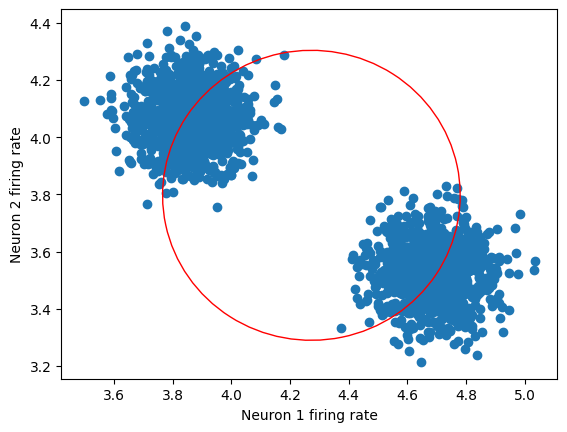

In [354]:
# g)
import numpy as np

def rate_model(s, w_ee, w_ei, w_ie, w_ii, sigma):
    """
    Recurrent rate model with excitatory-excitatory (ee), excitatory-inhibitory (ei),
    inhibitory-excitatory (ie), and inhibitory-inhibitory (ii) connections.
    """
    r1 = np.exp(np.cos(s))
    r2 = np.exp(np.cos(s - np.pi/4))
    
    # Recurrent dynamics
    r1_out = r1 + w_ee*r1 - w_ei*r2 + sigma*np.random.normal()
    r2_out = r2 + w_ie*r1 - w_ii*r2 + sigma*np.random.normal()
    
    return r1_out, r2_out

# Example parameters
w_ee = 0.5
w_ei = -0.3
w_ie = 0.4
w_ii = -0.2
sigma = 0.1

# Repeat the plot from part e)
s1 = 0
s2 = np.pi/4
r1_list = []
r2_list = []
for i in range(1000):
    r1, r2 = rate_model(s1, w_ee, w_ei, w_ie, w_ii, sigma)
    r1_list.append(r1)
    r2_list.append(r2)
    r1, r2 = rate_model(s2, w_ee, w_ei, w_ie, w_ii, sigma)
    r1_list.append(r1)
    r2_list.append(r2)

# Plot the scatter plot, covariance, and decision boundary
plt.figure()
plt.scatter(r1_list, r2_list)
plt.xlabel('Neuron 1 firing rate')
plt.ylabel('Neuron 2 firing rate')

# Compute and plot covariance ellipse
cov = np.cov(r1_list, r2_list)
eigenvalues, eigenvectors = np.linalg.eig(cov)
angle = np.arctan2(eigenvectors[1,0], eigenvectors[0,0])
width, height = 2 * np.sqrt(eigenvalues)
ellipse = plt.Circle((np.mean(r1_list), np.mean(r2_list)), width/2, angle=np.rad2deg(angle), fill=False, color='r')
plt.gca().add_artist(ellipse)




**Answer g)**

The recurrent network model can produce both positive and negative noise correlations, depending on the specific values of the connection weights (w_ee, w_ei, w_ie, w_ii). In the example above, the resulting noise correlations can be either positive or negative, depending on the relative strengths of the excitatory and inhibitory connections.

The noise correlations in this model can support or obstruct decoding, depending on the specific task and the relationship between the signal and noise correlations. If the noise correlations are aligned with the signal correlations, they can enhance the separation between the stimulus representations and improve decoding performance. Conversely, if the noise correlations are orthogonal to the signal correlations, they can introduce ambiguity and degrade decoding accuracy.


In [310]:
# h)